# Week 12 Exercises
## Joining Tables with `pandas`

[merge() documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.merge.html#pandas.DataFrame.merge)

Reference 1: [Joining Tables in pandas](https://www.analyticsvidhya.com/blog/2020/02/joins-in-pandas-master-the-different-types-of-joins-in-python/)

Reference 2: [Visual Representation of Joining Tables](https://www.postgresqltutorial.com/postgresql-joins/)

### Learning Objectives
1. Read and understand an entity relationship diagram (ERD)
>- Identify the tables and fields in a database
>- Identify keys (primary/foreign) keys that join tables together
2. Perform exploratory data analysis (EDA), <a id='Section 1'></a>[Section 1: EDA](#Section-1)
3. Join tables to extract data from multiple sources: <a id='Section 2'></a>[Section 2: Joins](#Section-2)

### A Database Model to Practice Joins 

We will use a fictional company's data model, `SaleCo`, to practice joining tables. The entity relationship model is shown below that helps illustrate the business rules listed here:
1. A customer may generate many invoices. Each invoice is generated by one customer
2. An invoice contains one or more invoice lines. Each invoice is generated by one customer.
3. Each invoice line references one product. A product may be found in many invoice lines (i.e, you can sell more than one hammer to more than one customer)
>- Within the invoice table, `line_units` gives us the quantity sold for each product and `line_price` gives us the unit cost. 
4. A vendor may supply  many products. Some vendors do not yet supply products. For example, a vendor list may include potential vendors. 
5. If a product is vendor-supplied, it is supplied by only a single vendor
6. Some products are not supplied by a vendor. For example, some products may be produced in-house or bought on the open market. 

#### Data needed for this tutorial
>- Download the following files from Canvas (or other source) and save in your working director for this notebook
>>- customer.csv
>>- invoice.csv
>>- line.csv
>>- product.csv
>>- vendor.csv

## Entity Relationship Diagram (ERD) of the SaleCo Database

### Examine the ERD to show you how tables are related
#### Note: You may need the `SaleCoERD.png` file saved in the same working direction as this notebook in order to see the image
>- customer and invoice can be joined on `CUS_CODE`
>- invoice and line can be joined on `INV_NUMBER`
>- line and product can be joined on `P_CODE`
>- product and vendor and be joined on `V_CODE`

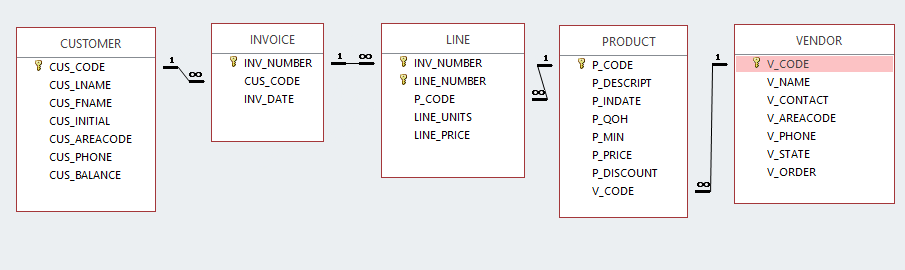

In [1]:
import pandas as pd, os
os.getcwd()

'C:\\Users\\Cupcake\\Google Drive\\School\\Senior Year 2020-2021\\Fall 2020\\BAIM 3220\\Python\\Week12'

### Create the `cust` dataframe from the customer.csv file

In [5]:
cust = pd.read_csv('SaleCo/customer.csv')
cust.head(2)

,CUS_CODE,CUS_LNAME,CUS_FNAME,CUS_INITIAL,CUS_AREACODE,CUS_PHONE,CUS_BALANCE
0,10010,Ramas,Alfred,A,615,844-2573,0.0
1,10011,Dunne,Leona,K,713,894-1238,0.0


### Create the `inv` dataframe from the invoice.csv file

In [7]:
inv = pd.read_csv('SaleCo/invoice.csv')
inv.head(2)

,INV_NUMBER,CUS_CODE,INV_DATE
0,1001,10014,16-Jan-18
1,1002,10011,16-Jan-18


### Create the `line` dataframe from the line.csv file

In [8]:
line = pd.read_csv('SaleCo/line.csv')
line.head(2)

,INV_NUMBER,LINE_NUMBER,P_CODE,LINE_UNITS,LINE_PRICE
0,1001,1,13-Q2/P2,1,14.99
1,1001,2,23109-HB,1,9.95


### Create the `prod` dataframe from the product.csv file

In [9]:
prod = pd.read_csv('SaleCo/product.csv')
prod.head(2)

,P_CODE,P_DESCRIPT,P_INDATE,P_QOH,P_MIN,P_PRICE,P_DISCOUNT,V_CODE
0,11QER/31,"Power painter, 15 psi., 3-nozzle",03-Nov-17,8,5,109.99,0.00,25595.0
1,13-Q2/P2,7.25-in. pwr. saw blade,13-Dec-17,32,15,14.99,0.05,21344.0


### Create the `vend` dataframe from the vendor.csv file

In [10]:
vend = pd.read_csv('SaleCo/vendor.csv')
vend.head(2)

,V_CODE,V_NAME,V_CONTACT,V_AREACODE,V_PHONE,V_STATE,V_ORDER
0,21225,"Bryson, Inc.",Smithson,615,223-3234,TN,Y
1,21226,"SuperLoo, Inc.",Flushing,904,215-8995,FL,N


# Section 1
## Getting Familiar with the SaleCo database

>- The questions in this section are mostly to help you get familiar with the data in the `SaleCo` database. You shouldn't need to join tables in this section and practice selecting and aggregating data. 

# Q1: What are the unique values for all of the columns in the `line` table? 
>- From this you should be answer questions such as:
>>- How many total invoices were there?
>>- How many total products were sold? (remember products could show up more than once)
>>- How many distinct prices of products are there?

In [24]:
line.describe(include='all')

,INV_NUMBER,LINE_NUMBER,P_CODE,LINE_UNITS,LINE_PRICE
count,18.000000,18.000000,18,18.000000,18.000000
unique,NaN,NaN,10,NaN,NaN
top,NaN,NaN,23109-HB,NaN,NaN
freq,NaN,NaN,4,NaN,NaN
mean,1004.888889,1.833333,NaN,2.555556,38.012778
std,2.348689,0.923548,NaN,2.705598,64.571199
min,1001.000000,1.000000,NaN,1.000000,4.990000
25%,1003.000000,1.000000,NaN,1.000000,6.150000
50%,1005.500000,2.000000,NaN,1.500000,9.950000
75%,1006.750000,2.000000,NaN,3.000000,32.960000


In [58]:
# line.agg({'INV_NUMBER':['sum','count','nunique'],
#          'LINE_UNITS':['sum','count'],
#          'LINE_PRICE':['nunique']})
line.agg(['nunique'])

,INV_NUMBER,LINE_NUMBER,P_CODE,LINE_UNITS,LINE_PRICE
nunique,8,4,10,5,10


# Q2: What is the overall number of units sold?
>- Also show the total number of distinct products sold in the output

In [54]:
line.agg({'LINE_UNITS':'sum',
         'P_CODE':'nunique'})

LINE_UNITS    46
P_CODE        10
dtype: int64

# Q3: What is the average units sold per invoice line?

In [56]:
round(line.LINE_UNITS.mean(),2)

2.56

In [57]:
line.groupby('LINE_NUMBER').LINE_UNITS.mean()

LINE_NUMBER
1    3.625000
2    1.500000
3    2.333333
4    1.000000
Name: LINE_UNITS, dtype: float64

# Q4: What is the average units sold per product?
>- Remember that products can occur on multiple lines in the line table so think through how to calculate this average correctly. 

In [48]:
line[['P_CODE','LINE_UNITS','LINE_PRICE']].groupby('P_CODE').mean()
# line.groupby(['P_CODE']).LINE_UNITS.agg(['mean'])

,LINE_UNITS,LINE_PRICE
P_CODE,,
13-Q2/P2,2.666667,14.99
1546-QQ2,1.000000,39.95
2232/QTY,1.000000,109.92
2238/QPD,1.000000,38.95
23109-HB,1.250000,9.95
54778-2T,2.000000,4.99
89-WRE-Q,1.000000,256.99
PVC23DRT,8.500000,5.87
SM-18277,3.000000,6.99


# Q5: What is the total inventory on hand for all our products?
>- Inventory can be found in the `product` table and the `P_QOH` filed which stands for Product Quantity on Hand
>- Also show the total number of unique products in this table

In [70]:
prod.groupby('P_CODE').P_QOH.agg(['sum'])

,sum
P_CODE,
11QER/31,8
13-Q2/P2,32
14-Q1/L3,18
1546-QQ2,15
1558-QW1,23
2232/QTY,8
2232/QWE,6
2238/QPD,12
23109-HB,23


In [71]:
prod.P_QOH.agg(['sum','nunique'])

sum        822
nunique     12
Name: P_QOH, dtype: int64

# Q6: What is the average product inventory?

In [72]:
prod.P_QOH.mean()

51.375

# Q7: What is the value of our inventory?
>- Examine the product table to help you answer this
>- Create a new feature in the `prod` dataframe named, `TOTVAL` that stores each's products inventory value
>- Then calculate and show the total value across all products

In [74]:
prod['TOTVAL'] = prod['P_QOH'] * prod['P_PRICE']

prod.head(2)

,P_CODE,P_DESCRIPT,P_INDATE,P_QOH,P_MIN,P_PRICE,P_DISCOUNT,V_CODE,TOTVAL
0,11QER/31,"Power painter, 15 psi., 3-nozzle",03-Nov-17,8,5,109.99,0.00,25595.0,879.92
1,13-Q2/P2,7.25-in. pwr. saw blade,13-Dec-17,32,15,14.99,0.05,21344.0,479.68


In [77]:
prod.groupby('P_CODE').TOTVAL.sum().to_frame()

,TOTVAL
P_CODE,
11QER/31,879.92
13-Q2/P2,479.68
14-Q1/L3,314.82
1546-QQ2,599.25
1558-QW1,1011.77
2232/QTY,879.36
2232/QWE,599.22
2238/QPD,467.40
23109-HB,228.85


# Q8: Write your own questions and continue examining the SaleCo dabase

>- Continue to explore the tables in this section as well as the others using exploratory data analysis methods we have discussed in class
>- Make sure you have a good understanding of the data that is stored in each field

# Section 2
## Joining tables using `pandas`

# Q9: 
## What is all the customer information for any of our customers that have an invoice? 
>- Show all the customer info (name, areacode, etc)
>- Remember, just because we have customer information doesn't mean they have created an invoice (i.e., placed an order) yet. 

In [79]:
custInv = cust.merge(inv, on = 'CUS_CODE') 
custInv

,CUS_CODE,CUS_LNAME,CUS_FNAME,CUS_INITIAL,CUS_AREACODE,CUS_PHONE,CUS_BALANCE,INV_NUMBER,INV_DATE
0,10011,Dunne,Leona,K,713,894-1238,0.00,1002,16-Jan-18
1,10011,Dunne,Leona,K,713,894-1238,0.00,1004,17-Jan-18
2,10011,Dunne,Leona,K,713,894-1238,0.00,1008,17-Jan-18
3,10012,Smith,Kathy,W,615,894-2285,345.86,1003,16-Jan-18
4,10014,Orlando,Myron,NaN,615,222-1672,0.00,1001,16-Jan-18
5,10014,Orlando,Myron,NaN,615,222-1672,0.00,1006,17-Jan-18
6,10015,O'Brian,Amy,B,713,442-3381,0.00,1007,17-Jan-18
7,10018,Farriss,Anne,G,713,382-7185,216.55,1005,17-Jan-18


In [81]:
custInv_j = cust.join(inv.set_index('CUS_CODE'),how = 'inner', on = 'CUS_CODE')
custInv_j

,CUS_CODE,CUS_LNAME,CUS_FNAME,CUS_INITIAL,CUS_AREACODE,CUS_PHONE,CUS_BALANCE,INV_NUMBER,INV_DATE
1,10011,Dunne,Leona,K,713,894-1238,0.00,1002,16-Jan-18
1,10011,Dunne,Leona,K,713,894-1238,0.00,1004,17-Jan-18
1,10011,Dunne,Leona,K,713,894-1238,0.00,1008,17-Jan-18
2,10012,Smith,Kathy,W,615,894-2285,345.86,1003,16-Jan-18
4,10014,Orlando,Myron,NaN,615,222-1672,0.00,1001,16-Jan-18
4,10014,Orlando,Myron,NaN,615,222-1672,0.00,1006,17-Jan-18
5,10015,O'Brian,Amy,B,713,442-3381,0.00,1007,17-Jan-18
8,10018,Farriss,Anne,G,713,382-7185,216.55,1005,17-Jan-18


# Q10: 
## Who are all our customers with or without an order (i.e., invoice)?
>- Note the difference in how this question is asked versus Q9
>- A common follow-up question is: Which customers do we have information on that haven't placed an order?
>>- This could indicate a lead list for our sales team to contact

In [83]:
custInvL = cust.merge(inv, on = 'CUS_CODE', how = 'left')
custInvL

,CUS_CODE,CUS_LNAME,CUS_FNAME,CUS_INITIAL,CUS_AREACODE,CUS_PHONE,CUS_BALANCE,INV_NUMBER,INV_DATE
0,10010,Ramas,Alfred,A,615,844-2573,0.00,NaN,NaN
1,10011,Dunne,Leona,K,713,894-1238,0.00,1002.0,16-Jan-18
2,10011,Dunne,Leona,K,713,894-1238,0.00,1004.0,17-Jan-18
3,10011,Dunne,Leona,K,713,894-1238,0.00,1008.0,17-Jan-18
4,10012,Smith,Kathy,W,615,894-2285,345.86,1003.0,16-Jan-18
5,10013,Olowski,Paul,F,615,894-2180,536.75,NaN,NaN
6,10014,Orlando,Myron,NaN,615,222-1672,0.00,1001.0,16-Jan-18
7,10014,Orlando,Myron,NaN,615,222-1672,0.00,1006.0,17-Jan-18
8,10015,O'Brian,Amy,B,713,442-3381,0.00,1007.0,17-Jan-18
9,10016,Brown,James,G,615,297-1228,221.19,NaN,NaN


In [85]:
custInvL_j = cust.join(inv.set_index('CUS_CODE'),how='left',on='CUS_CODE')
custInvL_j

,CUS_CODE,CUS_LNAME,CUS_FNAME,CUS_INITIAL,CUS_AREACODE,CUS_PHONE,CUS_BALANCE,INV_NUMBER,INV_DATE
0,10010,Ramas,Alfred,A,615,844-2573,0.00,NaN,NaN
1,10011,Dunne,Leona,K,713,894-1238,0.00,1002.0,16-Jan-18
1,10011,Dunne,Leona,K,713,894-1238,0.00,1004.0,17-Jan-18
1,10011,Dunne,Leona,K,713,894-1238,0.00,1008.0,17-Jan-18
2,10012,Smith,Kathy,W,615,894-2285,345.86,1003.0,16-Jan-18
3,10013,Olowski,Paul,F,615,894-2180,536.75,NaN,NaN
4,10014,Orlando,Myron,NaN,615,222-1672,0.00,1001.0,16-Jan-18
4,10014,Orlando,Myron,NaN,615,222-1672,0.00,1006.0,17-Jan-18
5,10015,O'Brian,Amy,B,713,442-3381,0.00,1007.0,17-Jan-18
6,10016,Brown,James,G,615,297-1228,221.19,NaN,NaN


##### Follow-up: Which customers do we have info on but haven't placed an order?
>- Only show these customers in your output

In [87]:
custInvL = cust.merge(inv, on = 'CUS_CODE', how = 'left',indicator = True)
custInvL.loc[custInvL['_merge']=='left_only']

,CUS_CODE,CUS_LNAME,CUS_FNAME,CUS_INITIAL,CUS_AREACODE,CUS_PHONE,CUS_BALANCE,INV_NUMBER,INV_DATE,_merge
0,10010,Ramas,Alfred,A,615,844-2573,0.00,NaN,NaN,left_only
5,10013,Olowski,Paul,F,615,894-2180,536.75,NaN,NaN,left_only
9,10016,Brown,James,G,615,297-1228,221.19,NaN,NaN,left_only
10,10017,Williams,George,NaN,615,290-2556,768.93,NaN,NaN,left_only
12,10019,Smith,Olette,K,615,297-3809,0.00,NaN,NaN,left_only


##### Show how many customers we have info on that don't have orders
>- Just show the count in your output

In [91]:
custInvL.loc[custInvL['_merge']=='left_only'].CUS_CODE.count()

5

# Q11: Which of our products have vendor information?
>- Remember, not all of our products come from vendors. For example, we could produce some products in-house. 

In [100]:
prodVend = prod.merge(vend, on = 'V_CODE',how = 'left',indicator=True)
prodVend[prodVend['_merge']=='both']

,P_CODE,P_DESCRIPT,P_INDATE,P_QOH,P_MIN,P_PRICE,P_DISCOUNT,V_CODE,TOTVAL,V_NAME,V_CONTACT,V_AREACODE,V_PHONE,V_STATE,V_ORDER,_merge
0,11QER/31,"Power painter, 15 psi., 3-nozzle",03-Nov-17,8,5,109.99,0.00,25595.0,879.92,Rubicon Systems,Orton,904.0,456-0092,FL,Y,both
1,13-Q2/P2,7.25-in. pwr. saw blade,13-Dec-17,32,15,14.99,0.05,21344.0,479.68,Gomez Bros.,Ortega,615.0,889-2546,KY,N,both
2,14-Q1/L3,9.00-in. pwr. saw blade,13-Nov-17,18,12,17.49,0.00,21344.0,314.82,Gomez Bros.,Ortega,615.0,889-2546,KY,N,both
3,1546-QQ2,"Hrd. cloth, 1/4-in., 2x50",15-Jan-18,15,8,39.95,0.00,23119.0,599.25,Randsets Ltd.,Anderson,901.0,678-3998,GA,Y,both
4,1558-QW1,"Hrd. cloth, 1/2-in., 3x50",15-Jan-18,23,5,43.99,0.00,23119.0,1011.77,Randsets Ltd.,Anderson,901.0,678-3998,GA,Y,both
5,2232/QTY,"B&D jigsaw, 12-in. blade",30-Dec-17,8,5,109.92,0.05,24288.0,879.36,"ORDVA, Inc.",Hakford,615.0,898-1234,TN,Y,both
6,2232/QWE,"B&D jigsaw, 8-in. blade",24-Dec-17,6,5,99.87,0.05,24288.0,599.22,"ORDVA, Inc.",Hakford,615.0,898-1234,TN,Y,both
7,2238/QPD,"B&D cordless drill, 1/2-in.",20-Jan-18,12,5,38.95,0.05,25595.0,467.40,Rubicon Systems,Orton,904.0,456-0092,FL,Y,both
8,23109-HB,Claw hammer,20-Jan-18,23,10,9.95,0.10,21225.0,228.85,"Bryson, Inc.",Smithson,615.0,223-3234,TN,Y,both
10,54778-2T,"Rat-tail file, 1/8-in. fine",15-Dec-17,43,20,4.99,0.00,21344.0,214.57,Gomez Bros.,Ortega,615.0,889-2546,KY,N,both


##### Q11 Follow-up. Show the number of products we have vendor info on.

In [105]:
prodVend.P_CODE.count()

16

# Q12: Which products do we produce in-house?
>- In other words, which products do we not have vendor info on?

In [101]:
prodVend[prodVend['_merge']=='left_only']

,P_CODE,P_DESCRIPT,P_INDATE,P_QOH,P_MIN,P_PRICE,P_DISCOUNT,V_CODE,TOTVAL,V_NAME,V_CONTACT,V_AREACODE,V_PHONE,V_STATE,V_ORDER,_merge
9,23114-AA,"Sledge hammer, 12 lb.",02-Jan-18,8,5,14.40,0.05,NaN,115.20,NaN,NaN,NaN,NaN,NaN,NaN,left_only
12,PVC23DRT,"PVC pipe, 3.5-in., 8-ft",20-Feb-18,188,75,5.87,0.00,NaN,1103.56,NaN,NaN,NaN,NaN,NaN,NaN,left_only


##### Q12 follow up: What is the total inventory of the products we produce in-house?

In [106]:
prodVend[prodVend['_merge']=='left_only'].P_QOH.sum()

196